<a href="https://colab.research.google.com/github/Rashilajayasinghe/DomainSpecified_AI_Assistant/blob/main/recDatasetPreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/fin_synthetic_samples (10).csv')

In [ ]:
data.count()

,0
Stage,10000
hours_per_week,10000
academic_stress,10000
choosing_new_courses_decision,10000
Mng_academic_tasks,10000
struggle_with_managing,10000
challenges_handling_workload,10000
start_assignments_closer_deadline,10000
Skill_Programming,10000
Skill_Math,10000


In [ ]:
data

,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
0,Stage 2,5 - 10 hrs,4,Personal interest in the subject;Career or job...,Notes on phone or paper,Sometimes,Balancing multiple courses or projects;Startin...,Sometimes,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.300058
1,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Sometimes,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,B,C,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.254988
2,Stage 4,3 - 5 hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Not knowing how to prioritize task,Always,4,2,...,D,NaN,NaN,NaN,NaN,NaN,B,C,NaN,75.719387
3,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,C,NaN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,93.725325
4,Stage 2,Less than 3hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Starting tasks too late,Always,4,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,74.555158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Stage 1,Less than 3hrs,4,Career or job relevance,Notes on phone or paper,Often,Starting tasks too late,Always,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.359538
9996,Stage 2,3 - 5 hrs,3,Career or job relevance,I usually remember them mentally,Always,Starting tasks too late,Always,3,2,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,75.657314
9997,Stage 2,3 - 5 hrs,4,Career or job relevance,I usually remember them mentally,Always,Starting tasks too late,Always,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,75.885250
9998,Stage 2,3 - 5 hrs,4,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Always,4,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,74.591267


In [ ]:
stage1_data = data[data['Stage'] == 'Stage 1']
null_values_stage1_cols13_20 = stage1_data.iloc[:, 13:20].isnull().sum()
display(null_values_stage1_cols13_20)

,0
Grade_CM1601,0
Grade_CM1602,0
Grade_CM1603,0
Grade_CM1604,0
Grade_CM1605,0
Grade_CM1606,0
Grade_CM1607,0


In [ ]:
stage2_data = data[data['Stage'] == 'Stage 2']
null_values_stage2_cols20_27 = stage2_data.iloc[:, 20:27].isnull().sum()
display(null_values_stage2_cols20_27)

,0
Grade_CM2601,672
Grade_CM2602,874
Grade_CM2603,687
Grade_CM2604,596
Grade_CM2605,808
Grade_CM2606,741
Grade_CM2607,744


In [ ]:
print("Null values in stage2_data grade columns (CM2601-CM2607) BEFORE imputation:")
display(stage2_data.iloc[:, 20:27].isnull().sum())

# Columns to impute based on previous analysis (Grade_CM2601 to Grade_CM2607)
grade_columns_stage2 = stage2_data.columns[20:27]

for col in grade_columns_stage2:
    if stage2_data[col].isnull().any():
        # Calculate the mode. .mode()[0] handles cases where there are multiple modes by taking the first one.
        col_mode = stage2_data[col].mode()[0]
        stage2_data[col] = stage2_data[col].fillna(col_mode)

print("\nNull values in stage2_data grade columns (CM2601-CM2607) AFTER imputation:")
display(stage2_data.iloc[:, 20:27].isnull().sum())

print("\nHead of stage2_data after imputation:")
display(stage2_data.head())

Null values in stage2_data grade columns (CM2601-CM2607) BEFORE imputation:


,0
Grade_CM2601,672
Grade_CM2602,874
Grade_CM2603,687
Grade_CM2604,596
Grade_CM2605,808
Grade_CM2606,741
Grade_CM2607,744



Null values in stage2_data grade columns (CM2601-CM2607) AFTER imputation:


/tmp/ipython-input-2739636046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage2_data[col] = stage2_data[col].fillna(col_mode)


,0
Grade_CM2601,0
Grade_CM2602,0
Grade_CM2603,0
Grade_CM2604,0
Grade_CM2605,0
Grade_CM2606,0
Grade_CM2607,0



Head of stage2_data after imputation:


,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
0,Stage 2,5 - 10 hrs,4,Personal interest in the subject;Career or job...,Notes on phone or paper,Sometimes,Balancing multiple courses or projects;Startin...,Sometimes,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.300058
4,Stage 2,Less than 3hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Starting tasks too late,Always,4,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,74.555158
5,Stage 2,3 - 5 hrs,4,Career or job relevance,I usually remember them mentally,Often,Starting tasks too late,Always,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,75.718817
8,Stage 2,Less than 3hrs,4,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Always,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,75.214490
10,Stage 2,Less than 3hrs,4,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Always,4,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.148433


In [ ]:
stage3_data = data[data['Stage'] == 'Stage 3']
null_values_stage3_cols27_31 = stage3_data.iloc[:, 27:31].isnull().sum()
display(null_values_stage3_cols27_31)

,0
Grade_CM3606,834
Grade_CM3604,767
Grade_CM3602,1292
Grade_CM3603,2508


In [ ]:
print("Null values in stage3_data grade columns (CM3606-CM3604) BEFORE imputation:")
display(stage3_data.iloc[:, 27:29].isnull().sum())

# Columns to impute based on previous analysis (CM3606-CM3604)
grade_columns_stage3 = stage3_data.columns[27:29]

for col in grade_columns_stage3:
    if stage3_data[col].isnull().any():
        # Calculate the mode. .mode()[0] handles cases where there are multiple modes by taking the first one.
        col_mode = stage3_data[col].mode()[0]
        stage3_data[col] = stage3_data[col].fillna(col_mode)

print("\nNull values in stage3_data grade columns (CM3606-CM3604) AFTER imputation:")
display(stage3_data.iloc[:, 27:29].isnull().sum())

print("\nHead of stage2_data after imputation:")
display(stage3_data.head())

Null values in stage3_data grade columns (CM3606-CM3604) BEFORE imputation:


,0
Grade_CM3606,834
Grade_CM3604,767



Null values in stage3_data grade columns (CM3606-CM3604) AFTER imputation:


/tmp/ipython-input-815143504.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage3_data[col] = stage3_data[col].fillna(col_mode)


,0
Grade_CM3606,0
Grade_CM3604,0



Head of stage2_data after imputation:


,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
1,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Sometimes,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,B,C,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.254988
3,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,C,NaN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,93.725325
7,Stage 3,5 - 10 hrs,2,Career or job relevance,I usually remember them mentally,Rarely,Balancing multiple courses or projects,Sometimes,4,5,...,D,C,B,NaN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.111154
11,Stage 3,5 - 10 hrs,3,Career or job relevance,Notes on phone or paper,Sometimes,Balancing multiple courses or projects,Sometimes,4,3,...,C,C,A,NaN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,75.934279
14,Stage 3,15+ hrs,3,Career or job relevance;Recommendations from f...,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Always,4,3,...,C,C,D,NaN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,71.043775


In [ ]:
stage4_data = data[data['Stage'] == 'Stage 4']
null_values_stage4_cols31_36 = stage4_data.iloc[:, 31:36].isnull().sum()
display(null_values_stage4_cols31_36)

,0
Grade_CM4605,1085
Grade_CM4604,1268
Grade_CM4601,1177
Grade_CM4606,1563
Grade_CM4603,1614


In [ ]:
print("Null values in stage4_data grade columns (CM4605-CM4601) BEFORE imputation:")
display(stage4_data.iloc[:, 31:34].isnull().sum())

# Columns to impute based on previous analysis (CM4605-CM4601)
grade_columns_stage4 = stage4_data.columns[31:34]

for col in grade_columns_stage4:
    if stage4_data[col].isnull().any():
        # Calculate the mode. .mode()[0] handles cases where there are multiple modes by taking the first one.
        col_mode = stage4_data[col].mode()[0]
        stage4_data[col] = stage4_data[col].fillna(col_mode)

print("\nNull values in stage3_data grade columns (CM4605-CM4601) AFTER imputation:")
display(stage4_data.iloc[:, 31:34].isnull().sum())

print("\nHead of stage2_data after imputation:")
display(stage4_data.head())

Null values in stage4_data grade columns (CM4605-CM4601) BEFORE imputation:


,0
Grade_CM4605,1085
Grade_CM4604,1268
Grade_CM4601,1177



Null values in stage3_data grade columns (CM4605-CM4601) AFTER imputation:


/tmp/ipython-input-3336320752.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage4_data[col] = stage4_data[col].fillna(col_mode)


,0
Grade_CM4605,0
Grade_CM4604,0
Grade_CM4601,0



Head of stage2_data after imputation:


,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
2,Stage 4,3 - 5 hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Not knowing how to prioritize task,Always,4,2,...,D,NaN,NaN,NaN,C,C,B,C,NaN,75.719387
12,Stage 4,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,D,B,C,C,C,NaN,NaN,94.656161
13,Stage 4,15+ hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,D,C,C,C,C,C,NaN,79.157815
28,Stage 4,5 - 10 hrs,3,Career or job relevance,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,5,...,C,C,C,NaN,C,C,C,NaN,NaN,86.458056
31,Stage 4,5 - 10 hrs,4,Career or job relevance,To-do list or planner apps,Sometimes,Balancing multiple courses or projects,Sometimes,4,5,...,C,C,NaN,NaN,B,C,C,C,NaN,85.999326


/tmp/ipython-input-2722841834.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_stages_non_nulls.index, y=all_stages_non_nulls.values, palette='tab20')


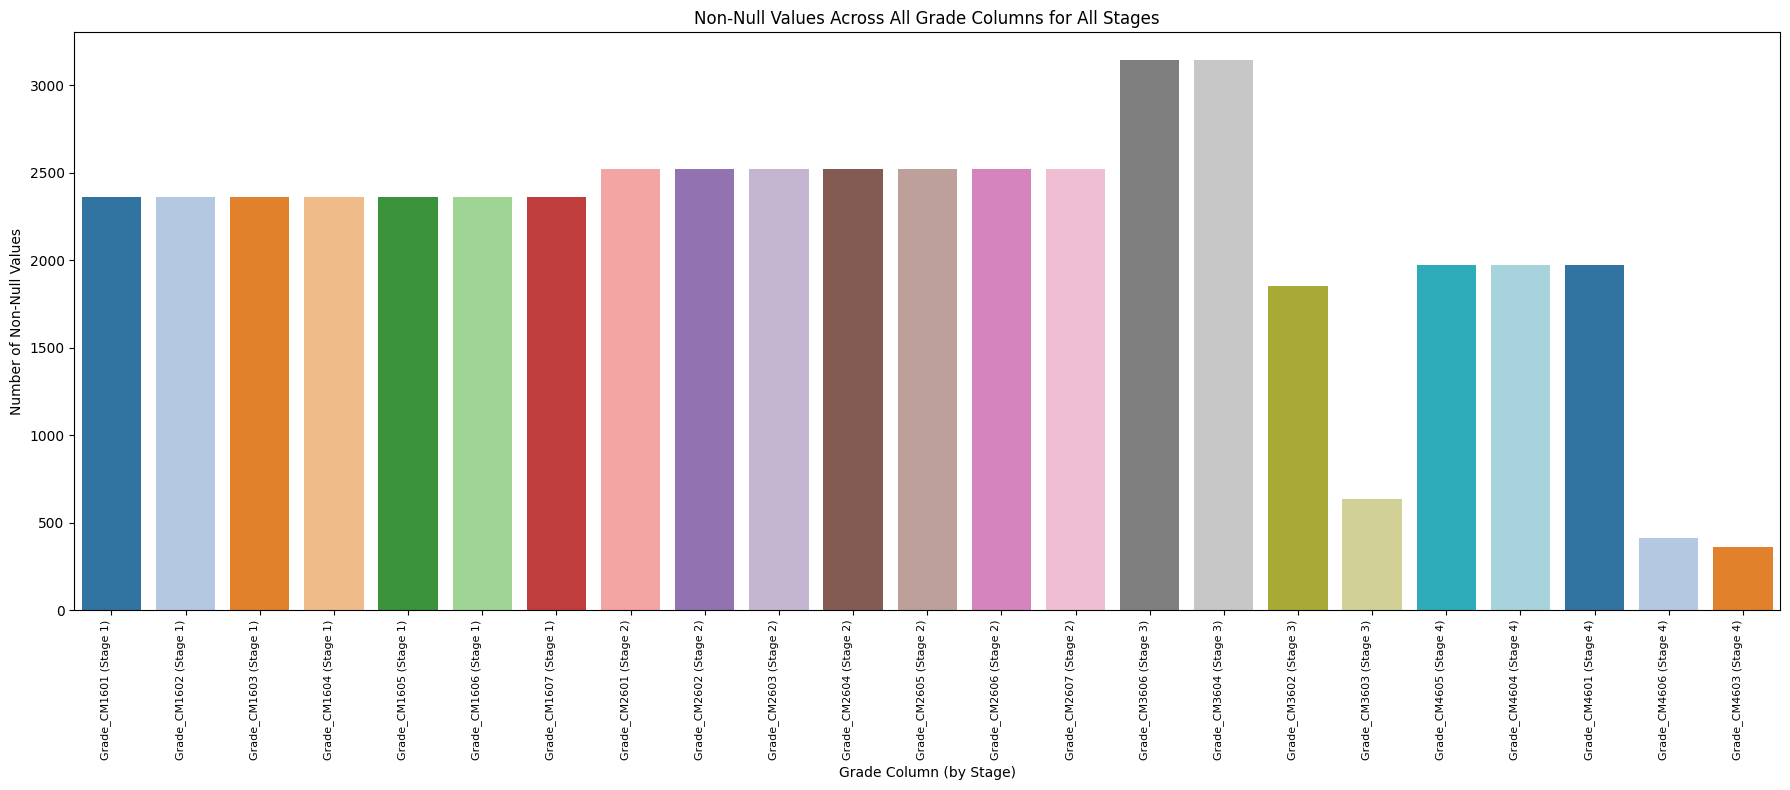

In [ ]:

# --- Stage 1 Data ---
# Based on the original data structure, CM1601-CM1607 are columns 13-20
grade_cols_s1 = data.columns[13:20]
non_null_s1 = stage1_data[grade_cols_s1].notna().sum()
non_null_s1 = non_null_s1.rename(lambda x: f'{x} (Stage 1)')

# --- Stage 2 Data ---
# Based on the original data structure, CM2601-CM2607 are columns 20-27
grade_cols_s2 = data.columns[20:27]
non_null_s2 = stage2_data[grade_cols_s2].notna().sum()
non_null_s2 = non_null_s2.rename(lambda x: f'{x} (Stage 2)')

# --- Stage 3 Data ---
# Based on the original data structure, CM3606-CM3603 are columns 27-31
grade_cols_s3 = data.columns[27:31]
non_null_s3 = stage3_data[grade_cols_s3].notna().sum()
non_null_s3 = non_null_s3.rename(lambda x: f'{x} (Stage 3)')

# --- Stage 4 Data ---
# Based on the original data structure, CM4605-CM4603 are columns 31-36
grade_cols_s4 = data.columns[31:36]
non_null_s4 = stage4_data[grade_cols_s4].notna().sum()
non_null_s4 = non_null_s4.rename(lambda x: f'{x} (Stage 4)')

# Combine all non-null counts
all_stages_non_nulls = pd.concat([non_null_s1, non_null_s2, non_null_s3, non_null_s4])

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=all_stages_non_nulls.index, y=all_stages_non_nulls.values, palette='tab20')
plt.title('Non-Null Values Across All Grade Columns for All Stages')
plt.xlabel('Grade Column (by Stage)')
plt.ylabel('Number of Non-Null Values')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Combine all cleaned stage datasets back into one DataFrame
modified_data = pd.concat([stage1_data, stage2_data, stage3_data, stage4_data], axis=0).sort_index()

In [ ]:
# Define the grade columns to check
grade_columns_to_check = [
    'Grade_CM1601', 'Grade_CM1602', 'Grade_CM1603', 'Grade_CM1604',
    'Grade_CM1605', 'Grade_CM1606', 'Grade_CM1607',
    'Grade_CM2601', 'Grade_CM2602', 'Grade_CM2603', 'Grade_CM2604',
    'Grade_CM2605', 'Grade_CM2606', 'Grade_CM2607'
]

# Mask for Stage 3 students
stage3_mask = (modified_data['Stage'] == 'Stage 3')

print("Current null values in specified grade columns for Stage 3 students:")
display(modified_data.loc[stage3_mask, grade_columns_to_check].isnull().sum())

# --- FILL NULL VALUES USING MODE FOR STAGE 3 ONLY ---
for col in grade_columns_to_check:
    # Only process columns that are actually present in the dataset
    if col in modified_data.columns:

        # Check if Stage 3 rows in this column contain null values
        null_count = modified_data.loc[stage3_mask, col].isnull().sum()

        if null_count > 0:
            # Calculate mode (most frequent value)
            col_mode = modified_data[col].mode()[0]

            # Fill null values for Stage 3 only
            modified_data.loc[stage3_mask, col] = modified_data.loc[stage3_mask, col].fillna(col_mode)

            print(f"Filled {null_count} null values in '{col}' with mode '{col_mode}'")

print("\nNull values AFTER imputation in Stage 3:")
display(modified_data.loc[stage3_mask, grade_columns_to_check].isnull().sum())


Current null values in specified grade columns for Stage 3 students:


,0
Grade_CM1601,0
Grade_CM1602,0
Grade_CM1603,0
Grade_CM1604,0
Grade_CM1605,0
Grade_CM1606,0
Grade_CM1607,0
Grade_CM2601,382
Grade_CM2602,411
Grade_CM2603,442


Filled 382 null values in 'Grade_CM2601' with mode 'C'
Filled 411 null values in 'Grade_CM2602' with mode 'C'
Filled 442 null values in 'Grade_CM2603' with mode 'D'
Filled 336 null values in 'Grade_CM2604' with mode 'C'
Filled 402 null values in 'Grade_CM2605' with mode 'C'
Filled 441 null values in 'Grade_CM2606' with mode 'C'
Filled 462 null values in 'Grade_CM2607' with mode 'D'

Null values AFTER imputation in Stage 3:


,0
Grade_CM1601,0
Grade_CM1602,0
Grade_CM1603,0
Grade_CM1604,0
Grade_CM1605,0
Grade_CM1606,0
Grade_CM1607,0
Grade_CM2601,0
Grade_CM2602,0
Grade_CM2603,0


In [ ]:
# List of all course columns to check for Stage 4
grade_columns_stage4 = [
    'Grade_CM1601', 'Grade_CM1602', 'Grade_CM1603', 'Grade_CM1604',
    'Grade_CM1605', 'Grade_CM1606', 'Grade_CM1607',
    'Grade_CM2601', 'Grade_CM2602', 'Grade_CM2603', 'Grade_CM2604',
    'Grade_CM2605', 'Grade_CM2606', 'Grade_CM2607',
    'Grade_CM3606', 'Grade_CM3604'
]

# Mask for Stage 4 students
stage4_mask = (modified_data['Stage'] == 'Stage 4')

print("Current null values in Stage 4 grade columns BEFORE imputation:")
display(modified_data.loc[stage4_mask, grade_columns_stage4].isnull().sum())

# --- Impute null values in Stage 4 ---
for col in grade_columns_stage4:

    # Only proceed if the column exists in the DataFrame
    if col in modified_data.columns:

        # Count nulls for Stage 4 students in this column
        null_count = modified_data.loc[stage4_mask, col].isnull().sum()

        if null_count > 0:

            # Compute mode of the entire column
            col_mode = modified_data[col].mode()[0]

            # Fill null values for Stage 4 students only
            modified_data.loc[stage4_mask, col] = (
                modified_data.loc[stage4_mask, col].fillna(col_mode)
            )

            print(f"Filled {null_count} null values in '{col}' with mode '{col_mode}'.")

print("\nNull values in Stage 4 grade columns AFTER imputation:")
display(modified_data.loc[stage4_mask, grade_columns_stage4].isnull().sum())


Current null values in Stage 4 grade columns BEFORE imputation:


,0
Grade_CM1601,0
Grade_CM1602,0
Grade_CM1603,0
Grade_CM1604,0
Grade_CM1605,0
Grade_CM1606,0
Grade_CM1607,0
Grade_CM2601,285
Grade_CM2602,296
Grade_CM2603,300


Filled 285 null values in 'Grade_CM2601' with mode 'C'.
Filled 296 null values in 'Grade_CM2602' with mode 'C'.
Filled 300 null values in 'Grade_CM2603' with mode 'D'.
Filled 211 null values in 'Grade_CM2604' with mode 'C'.
Filled 225 null values in 'Grade_CM2605' with mode 'C'.
Filled 284 null values in 'Grade_CM2606' with mode 'C'.
Filled 295 null values in 'Grade_CM2607' with mode 'D'.
Filled 530 null values in 'Grade_CM3606' with mode 'NOT_TAKEN'.
Filled 490 null values in 'Grade_CM3604' with mode 'NOT_TAKEN'.

Null values in Stage 4 grade columns AFTER imputation:


,0
Grade_CM1601,0
Grade_CM1602,0
Grade_CM1603,0
Grade_CM1604,0
Grade_CM1605,0
Grade_CM1606,0
Grade_CM1607,0
Grade_CM2601,0
Grade_CM2602,0
Grade_CM2603,0


In [ ]:
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Stage                               10000 non-null  object 
 1   hours_per_week                      10000 non-null  object 
 2   academic_stress                     10000 non-null  int64  
 3   choosing_new_courses_decision       10000 non-null  object 
 4   Mng_academic_tasks                  10000 non-null  object 
 5   struggle_with_managing              10000 non-null  object 
 6   challenges_handling_workload        10000 non-null  object 
 7    start_assignments_closer_deadline  10000 non-null  object 
 8   Skill_Programming                   10000 non-null  int64  
 9   Skill_Math                          10000 non-null  int64  
 10  Skill_DS_Algo                       10000 non-null  int64  
 11  Skill_Technical_Comm                10000 non-n

# **handling the elective columns**

In [ ]:
# Filter modified_data for Stage 3 students
stage3_modified_data = modified_data[modified_data['Stage'] == 'Stage 3']

# Condition: both are null
both_null_count = stage3_modified_data[
    stage3_modified_data['Grade_CM3602'].isnull() &
    stage3_modified_data['Grade_CM3603'].isnull()
].shape[0]

# Condition: both are not null
both_not_null_count = stage3_modified_data[
    stage3_modified_data['Grade_CM3602'].notna() &
    stage3_modified_data['Grade_CM3603'].notna()
].shape[0]

print(f"For Stage 3 students (in modified_data) in Grade_CM3602 and Grade_CM3603:")
print(f"- Number of rows where BOTH are null: {both_null_count}")
print(f"- Number of rows where BOTH are NOT null: {both_not_null_count}")

For Stage 3 students (in modified_data) in Grade_CM3602 and Grade_CM3603:
- Number of rows where BOTH are null: 1085
- Number of rows where BOTH are NOT null: 430


In [ ]:


# Get Stage 3 data mask for 'Grade_CM3602' and 'Grade_CM3603'
stage3_mask = (modified_data['Stage'] == 'Stage 3')

# Calculate modes for CM3602 and CM3603 from current Stage 3 data for filling
# Provide a fallback grade if the mode calculation results in an empty series (e.g., all NaNs)
mode_cm3602 = modified_data.loc[stage3_mask, 'Grade_CM3602'].mode().get(0, 'C')
mode_cm3603 = modified_data.loc[stage3_mask, 'Grade_CM3603'].mode().get(0, 'C')

print("Applying 'randomly add if both null'...")
# Operation 1: Randomly add a grade if both are null
both_null_indices = modified_data[stage3_mask & modified_data['Grade_CM3602'].isnull() & modified_data['Grade_CM3603'].isnull()].index
for idx in both_null_indices:
    if np.random.rand() < 0.5:
        modified_data.loc[idx, 'Grade_CM3602'] = mode_cm3602
    else:
        modified_data.loc[idx, 'Grade_CM3603'] = mode_cm3603

print("Applying 'randomly remove if both not null'...")
# Operation 2: Randomly remove a grade if both are not null
both_not_null_indices = modified_data[stage3_mask & modified_data['Grade_CM3602'].notna() & modified_data['Grade_CM3603'].notna()].index
for idx in both_not_null_indices:
    if np.random.rand() < 0.5:
        modified_data.loc[idx, 'Grade_CM3602'] = np.nan
    else:
        modified_data.loc[idx, 'Grade_CM3603'] = np.nan

print("\nOperations completed. Displaying updated counts for Stage 3 grades:")
# Display null and non-null counts for Stage 3 after operations
stage3_modified_data_after_ops = modified_data[stage3_mask]

# Recalculate both null and both not null counts after the operations
both_null_count_after = stage3_modified_data_after_ops[
    stage3_modified_data_after_ops['Grade_CM3602'].isnull() &
    stage3_modified_data_after_ops['Grade_CM3603'].isnull()
].shape[0]

both_not_null_count_after = stage3_modified_data_after_ops[
    stage3_modified_data_after_ops['Grade_CM3602'].notna() &
    stage3_modified_data_after_ops['Grade_CM3603'].notna()
].shape[0]

print(f"For Stage 3 students (in modified_data) in Grade_CM3602 and Grade_CM3603 AFTER operations:")
print(f"- Number of rows where BOTH are null: {both_null_count_after}")
print(f"- Number of rows where BOTH are NOT null: {both_not_null_count_after}")

print("\nHead of modified_data after all operations:")
display(modified_data.loc[stage3_mask, ['Grade_CM3602', 'Grade_CM3603']].head())

Applying 'randomly add if both null'...
Applying 'randomly remove if both not null'...

Operations completed. Displaying updated counts for Stage 3 grades:
For Stage 3 students (in modified_data) in Grade_CM3602 and Grade_CM3603 AFTER operations:
- Number of rows where BOTH are null: 0
- Number of rows where BOTH are NOT null: 0

Head of modified_data after all operations:


,Grade_CM3602,Grade_CM3603
1,NaN,C
3,C,NaN
7,B,NaN
11,A,NaN
14,D,NaN


In [ ]:
# Filter modified_data for Stage 4 students
stage4_modified_data = modified_data[modified_data['Stage'] == 'Stage 4']

# Condition: both are null
both_null_count = stage4_modified_data[
    stage4_modified_data['Grade_CM4606'].isnull() &
    stage4_modified_data['Grade_CM4603'].isnull()
].shape[0]

# Condition: both are not null
both_not_null_count = stage4_modified_data[
    stage4_modified_data['Grade_CM4606'].notna() &
    stage4_modified_data['Grade_CM4603'].notna()
].shape[0]

print(f"For Stage 4 students (in modified_data) in Grade_CM4606 and Grade_CM4603:")
print(f"- Number of rows where BOTH are null: {both_null_count}")
print(f"- Number of rows where BOTH are NOT null: {both_not_null_count}")

For Stage 4 students (in modified_data) in Grade_CM4606 and Grade_CM4603:
- Number of rows where BOTH are null: 1289
- Number of rows where BOTH are NOT null: 85


In [ ]:


# Get Stage 4 data mask for 'Grade_CM4606' and 'Grade_CM4603'
stage4_mask = (modified_data['Stage'] == 'Stage 4')

# Calculate modes for CM4606 and CM4603 from current Stage 4 data for filling
# Provide a fallback grade if the mode calculation results in an empty series (e.g., all NaNs)
mode_cm4606 = modified_data.loc[stage4_mask, 'Grade_CM4606'].mode().get(0, 'C')
mode_cm4603 = modified_data.loc[stage4_mask, 'Grade_CM4603'].mode().get(0, 'C')

print("Applying 'randomly add if both null' for Stage 4...")
# Operation 1: Randomly add a grade if both are null
both_null_indices = modified_data[stage4_mask & modified_data['Grade_CM4606'].isnull() & modified_data['Grade_CM4603'].isnull()].index
for idx in both_null_indices:
    if np.random.rand() < 0.5:
        modified_data.loc[idx, 'Grade_CM4606'] = mode_cm4606
    else:
        modified_data.loc[idx, 'Grade_CM4603'] = mode_cm4603

print("Applying 'randomly remove if both not null' for Stage 4...")
# Operation 2: Randomly remove a grade if both are not null
both_not_null_indices = modified_data[stage4_mask & modified_data['Grade_CM4606'].notna() & modified_data['Grade_CM4603'].notna()].index
for idx in both_not_null_indices:
    if np.random.rand() < 0.5:
        modified_data.loc[idx, 'Grade_CM4606'] = np.nan
    else:
        modified_data.loc[idx, 'Grade_CM4603'] = np.nan

print("\nOperations completed for Stage 4. Displaying updated counts:")
# Display null and non-null counts for Stage 4 after operations
stage4_modified_data_after_ops = modified_data[stage4_mask]

# Recalculate both null and both not null counts after the operations
both_null_count_after_s4 = stage4_modified_data_after_ops[
    stage4_modified_data_after_ops['Grade_CM4606'].isnull() &
    stage4_modified_data_after_ops['Grade_CM4603'].isnull()
].shape[0]

both_not_null_count_after_s4 = stage4_modified_data_after_ops[
    stage4_modified_data_after_ops['Grade_CM4606'].notna() &
    stage4_modified_data_after_ops['Grade_CM4603'].notna()
].shape[0]

print(f"For Stage 4 students (in modified_data) in Grade_CM4606 and Grade_CM4603 AFTER operations:")
print(f"- Number of rows where BOTH are null: {both_null_count_after_s4}")
print(f"- Number of rows where BOTH are NOT null: {both_not_null_count_after_s4}")

print("\nHead of modified_data for Stage 4 after all operations (relevant columns):")
display(modified_data.loc[stage4_mask, ['Grade_CM4606', 'Grade_CM4603']].head())

Applying 'randomly add if both null' for Stage 4...
Applying 'randomly remove if both not null' for Stage 4...

Operations completed for Stage 4. Displaying updated counts:
For Stage 4 students (in modified_data) in Grade_CM4606 and Grade_CM4603 AFTER operations:
- Number of rows where BOTH are null: 0
- Number of rows where BOTH are NOT null: 0

Head of modified_data for Stage 4 after all operations (relevant columns):


,Grade_CM4606,Grade_CM4603
2,C,NaN
12,NaN,C
13,C,NaN
28,NaN,C
31,C,NaN


In [ ]:
print("--- Final Inspection: modified_data Info ---")
modified_data.info()

print("\n--- Final Inspection: Head of modified_data ---")
display(modified_data.head())

--- Final Inspection: modified_data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Stage                               10000 non-null  object 
 1   hours_per_week                      10000 non-null  object 
 2   academic_stress                     10000 non-null  int64  
 3   choosing_new_courses_decision       10000 non-null  object 
 4   Mng_academic_tasks                  10000 non-null  object 
 5   struggle_with_managing              10000 non-null  object 
 6   challenges_handling_workload        10000 non-null  object 
 7    start_assignments_closer_deadline  10000 non-null  object 
 8   Skill_Programming                   10000 non-null  int64  
 9   Skill_Math                          10000 non-null  int64  
 10  Skill_DS_Algo                       10000 non-null  int64  
 11  Sk

,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
0,Stage 2,5 - 10 hrs,4,Personal interest in the subject;Career or job...,Notes on phone or paper,Sometimes,Balancing multiple courses or projects;Startin...,Sometimes,3,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.300058
1,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Sometimes,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,NaN,C,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,76.254988
2,Stage 4,3 - 5 hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Not knowing how to prioritize task,Always,4,2,...,D,NOT_TAKEN,NaN,NaN,C,C,B,C,NaN,75.719387
3,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,4,...,C,C,C,NaN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,93.725325
4,Stage 2,Less than 3hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Starting tasks too late,Always,4,3,...,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,NOT_TAKEN,74.555158


In [ ]:
modified_data.to_csv('modified_data.csv', index=False)